In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gapminder_csv_url ='http://bit.ly/2cLzoxH'
gapminder = pd.read_csv(gapminder_csv_url)
gapminder

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


# 1.

In [3]:
# Resumen estadistico del dataframe
gapminder.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


# 2. Agrupe por la variable “año”. Comente respecto al resultado al usar groupby

In [4]:
# agrupar por year
agrupado = gapminder.groupby('year')

# Como resultado se obtiene un objeto de tipo DataFrameGroupBy que contiene la data agrupada por la variable year.
agrupado

# 3.Ahora obtenga la suma (la cantidad), la media y la mediana para cada grupo, es decir, por año.

In [5]:
# agrupar por year y agg de suma,media,mediana
agrupado.agg(
    {
        'lifeExp': ['sum','mean','median'],
        'pop': ['sum','mean','median'],
        'gdpPercap': ['sum','mean','median']
    })

lifeExp                               pop                             
             sum       mean   median           sum          mean      median   
year                                                                           
1952  6966.18200  49.057620  45.1355  2.406957e+09  1.695040e+07   3943953.0  \
1957  7314.05096  51.507401  48.3605  2.664405e+09  1.876341e+07   4282942.0   
1962  7612.51336  53.609249  50.8810  2.899783e+09  2.042101e+07   4686039.5   
1967  7906.31712  55.678290  53.8250  3.217478e+09  2.265830e+07   5170175.5   
1972  8185.92888  57.647386  56.5300  3.576977e+09  2.518998e+07   5877996.5   
1977  8458.96236  59.570157  59.6720  3.930046e+09  2.767638e+07   6404036.5   
1982  8737.71400  61.533197  62.4415  4.289437e+09  3.020730e+07   7007320.0   
1987  8976.19100  63.212613  65.8340  4.691477e+09  3.303857e+07   7774861.5   
1992  9110.76800  64.160338  67.7030  5.110710e+09  3.599092e+07   8688686.5   
1997  9232.08400  65.014676  69.3940  5.515204e+09  3.883947e+07   9735063.5   
2002  9328.67900  65.694923  70.8255  5.886978e+09  4.145759e+07  10372918.5   
2007  9515.05400  67.007423  71.9355  6.251013e+09  4.402122e+07  10517531.0   

         gdpPercap                             
               sum          mean       median  
year                                           
1952  5.289892e+05   3725.276046  1968.528344  
1957  6.105160e+05   4299.408345  2173.220291  
1962  6.710654e+05   4725.812342  2335.439533  
1967  7.786787e+05   5483.653047  2678.334740  
1972  9.613518e+05   6770.082815  3339.129407  
1977  1.038470e+06   7313.166421  3798.609244  
1982  1.067684e+06   7518.901673  4216.228428  
1987  1.121931e+06   7900.920218  4280.300366  
1992  1.158522e+06   8158.608521  4386.085502  
1997  1.290805e+06   9090.175363  4781.825478  
2002  1.408334e+06   9917.848365  5319.804524  
2007  1.658570e+06  11680.071820  6124.371108

# 4.

In [6]:
agrupado = gapminder.groupby(['year','country'])
agrupado.get_group((1967,'Chile'))

# Del resultado se obtiene que para Chile en el año 1967 la población era de 8858908 habitantes
# quienes representaban una esperanza de vida de 60.523 años y se tenia un PIB per capita de 5106.654313.

,country,year,pop,continent,lifeExp,gdpPercap
279,Chile,1967,8858908.0,Americas,60.523,5106.654313


# Tablas pivote

# 1.

In [7]:
# crear pivote fijando continent,calculando media, suma y mediana de pop, lifeExp y gdpPercap
gapminder.pivot_table(
    columns='continent',
    values=['lifeExp','gdpPercap','pop'],
    aggfunc= {
        'lifeExp': ['sum','mean','median'],
        'pop': ['sum','mean','median'],
        'gdpPercap': ['sum','mean','median']
    } 
)

continent               Africa      Americas          Asia        Europe   
gdpPercap mean    2.193755e+03  7.136110e+03  7.902150e+03  1.446948e+04  \
          median  1.192138e+03  5.465510e+03  2.646787e+03  1.208175e+04   
          sum     1.368903e+06  2.140833e+06  3.129252e+06  5.209011e+06   
lifeExp   mean    4.886533e+01  6.465874e+01  6.006490e+01  7.190369e+01   
          median  4.779200e+01  6.704800e+01  6.179150e+01  7.224100e+01   
          sum     3.049197e+04  1.939762e+04  2.378570e+04  2.588533e+04   
pop       mean    9.916003e+06  2.450479e+07  7.703872e+07  1.716976e+07   
          median  4.579311e+06  6.227510e+06  1.453083e+07  8.551125e+06   
          sum     6.187586e+09  7.351438e+09  3.050733e+10  6.181115e+09   

continent              Oceania  
gdpPercap mean    1.862161e+04  
          median  1.798330e+04  
          sum     4.469186e+05  
lifeExp   mean    7.432621e+01  
          median  7.366500e+01  
          sum     1.783829e+03  
pop       mean    8.874672e+06  
          median  6.403492e+06  
          sum     2.129921e+08

# 2.

In [8]:
# crear pivote fijando continent y year,calculando media, suma y mediana de pop, lifeExp y gdpPercap
gapminder.pivot_table(
    index='year',
    columns='continent',
    values=['lifeExp','gdpPercap','pop'],
    aggfunc= {
        'lifeExp': ['sum','mean','median'],
        'pop': ['sum','mean','median'],
        'gdpPercap': ['sum','mean','median']
    } 
)

# De la tabla pivote se puede observar que el continente con mayor esperanza de vida es Oceania y el de menor es Africa.
# El continente con mayor PIB per capita es America y el de menor es Africa.
# El continente con mayor poblacion es Asia y el de menor es Oceania seguido de Africa.
# En sintesis se puede observar que el contiente africano es el que en general presenta peores indicadores


gdpPercap                                             
                  mean                                             
continent       Africa      Americas          Asia        Europe   
year                                                               
1952       1252.572466   4079.062552   5195.484004   5661.057435  \
1957       1385.236062   4616.043733   5787.732940   6963.012816   
1962       1598.078825   4901.541870   5729.369625   8365.486814   
1967       2050.363801   5668.253496   5971.173374  10143.823757   
1972       2339.615674   6491.334139   8187.468699  12479.575246   
1977       2585.938508   7352.007126   7791.314020  14283.979110   
1982       2481.592960   7506.737088   7434.135157  15617.896551   
1987       2282.668991   7793.400261   7608.226508  17214.310727   
1992       2281.810333   8044.934406   8639.690248  17061.568084   
1997       2378.759555   8889.300863   9834.093295  19076.781802   
2002       2599.385159   9287.677107  10174.090397  21711.732422   
2007       3089.032605  11003.031625  12473.026870  25054.481636   

                                                                               
                              median                                           
continent       Oceania       Africa     Americas         Asia        Europe   
year                                                                           
1952       10298.085650   987.025569  3048.302900  1206.947913   5142.469716  \
1957       11598.522455  1024.022987  3780.546651  1547.944844   6066.721495   
1962       12696.452430  1133.783678  4086.114078  1649.552153   7515.733737   
1967       14495.021790  1210.376379  4643.393534  2029.228142   9366.067033   
1972       16417.333380  1443.372508  5305.445256  2571.423014  12326.379990   
1977       17283.957605  1399.638836  6281.290855  3195.484582  14225.754515   
1982       18554.709840  1323.728306  6434.501797  4106.525293  15322.824720   
1987       20448.040160  1219.585563  6360.943444  4106.492315  16215.485895   
1992       20894.045885  1161.631357  6618.743050  3726.063507  17550.155945   
1997       24024.175170  1179.883114  7113.692252  3645.379572  19596.498550   
2002       26938.778040  1215.683217  6994.774861  4090.925331  23674.863230   
2007       29810.188275  1452.267078  8948.102923  4471.061906  28054.065790   

                         ...         pop                                     
                         ...      median                                     
continent       Oceania  ...      Africa   Americas        Asia     Europe   
year                     ...                                                 
1952       10298.085650  ...   2668124.5  3146381.0   7982342.0  7199786.5  \
1957       11598.522455  ...   2885790.5  3507701.0   9128546.0  7507528.0   
1962       12696.452430  ...   3145210.0  3880130.0  10267083.0  7814503.0   
1967       14495.021790  ...   3473692.5  4318137.0  11261690.0  8140724.0   
1972       16417.333380  ...   3945594.5  4698301.0  12412593.0  8444744.0   
1977       17283.957605  ...   4522666.0  5302800.0  13933198.0  8741694.5   
1982       18554.709840  ...   5668228.5  5968349.0  14441916.0  8962461.0   
1987       20448.040160  ...   6635611.5  6655297.0  16495304.0  9101370.5   
1992       20894.045885  ...   7140388.5  7351181.0  17861905.0  9272632.0   
1997       24024.175170  ...   7805422.5  7992357.0  21229759.0  9527017.0   
2002       26938.778040  ...   8821778.5  8650322.0  22662365.0  9518744.0   
2007       29810.188275  ...  10093310.5  9319622.0  24821286.0  9493598.0   

                                                                             
                               sum                                           
continent     Oceania       Africa     Americas          Asia       Europe   
year                                                                         
1952        5343003.0  237640501.0  345152446.0  1.395357e+09  418120846.0  \
1957

# 3.

In [9]:
# Con las variables anteriores, obtenga el promedio de la variable “pop”.
gapminder.pivot_table(
    index='year',
    columns='continent',
    values='pop',
    aggfunc= 'mean'
)   

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,4.570010e+06,13806097.84,4.228356e+07,1.393736e+07,5343003.0
1957,5.093033e+06,15478156.64,4.735699e+07,1.459635e+07,5970988.0
1962,5.702247e+06,17330810.16,5.140476e+07,1.534517e+07,6641759.0
1967,6.447875e+06,19229864.92,5.774736e+07,1.603930e+07,7300207.0
1972,7.305376e+06,21175368.40,6.518098e+07,1.668784e+07,8053050.0
1977,8.328097e+06,23122707.96,7.225799e+07,1.723882e+07,8619500.0
1982,9.602857e+06,25211636.80,7.909502e+07,1.770890e+07,9197425.0
1987,1.105450e+07,27310158.84,8.700669e+07,1.810314e+07,9787207.5
1992,1.267464e+07,29570964.16,9.494825e+07,1.860476e+07,10459825.5


C:\Users\diego\AppData\Local\Temp\ipykernel_24268\3974944611.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


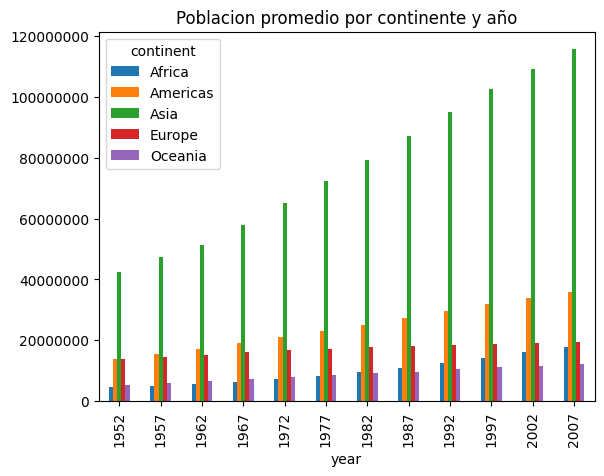

In [10]:
# Obtenga un gráfico de barras del punto 3, comente sus resultados.
gapminder.pivot_table(
    index='year',
    columns='continent',
    values='pop',
    aggfunc= 'mean'
).plot(kind='bar')

# titulo
plt.title('Poblacion promedio por continente y año')

# arreglar escala del eje y para que no se vea con notacion cientifica
plt.ticklabel_format(style='plain', axis='y')

# cambiar palette de colores
plt.style.use('seaborn-pastel')

# Del grafico se infiere que el promedio de población  del contiente asitico es bastante mayor que el resto de los continentes,
# y ha ido incrementando con mayor intensidad con el paso de los años. 
# # Tambien se puede observar que el continente con menor población es Oceanía seguido de Africa.